# 三、探索性的数据分析EDA

In [1]:
# 导入必要模块
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

# 评价指标
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, log_loss

plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"]=False


In [2]:
# 导入数据集
train = pd.read_csv('C:/Users/ljnlj/Downloads/train.csv')
test = pd.read_csv('C:/Users/ljnlj/Downloads/testA.csv')

In [3]:
# 数据基本信息分析
print('训练集形状:', train.shape)  # 输出：(800000, 47)
print('测试集形状:', test.shape)  # 输出：(200000, 46)（无目标变量）
train.info()

训练集形状: (800000, 47)
测试集形状: (200000, 46)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  

In [4]:
# 查看部分数据
train.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


### 3.1 总体分布

In [5]:
# 样本个数和特征维度
train.shape

(800000, 47)

In [6]:
# 样本个数和特征维度
test.shape

(200000, 46)

In [7]:
# 查看特征名
train.columns
'''
Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'isDefault',
       'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object')
'''

"\nIndex(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',\n       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',\n       'annualIncome', 'verificationStatus', 'issueDate', 'isDefault',\n       'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',\n       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',\n       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',\n       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',\n       'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8',\n       'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],\n      dtype='object')\n"

In [8]:
# 查看数据集的基本信息（缺失情况、类型…）
train.info()
'''
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
id                    800000 non-null int64
loanAmnt              800000 non-null float64
term                  800000 non-null int64
interestRate          800000 non-null float64
installment           800000 non-null float64
grade                 800000 non-null object
subGrade              800000 non-null object
employmentTitle       799999 non-null float64
employmentLength      753201 non-null object
homeOwnership         800000 non-null int64
annualIncome          800000 non-null float64
verificationStatus    800000 non-null int64
issueDate             800000 non-null object
isDefault             800000 non-null int64
purpose               800000 non-null int64
postCode              799999 non-null float64
regionCode            800000 non-null int64
dti                   799761 non-null float64
delinquency_2years    800000 non-null float64
ficoRangeLow          800000 non-null float64
ficoRangeHigh         800000 non-null float64
openAcc               800000 non-null float64
pubRec                800000 non-null float64
pubRecBankruptcies    799595 non-null float64
revolBal              800000 non-null float64
revolUtil             799469 non-null float64
totalAcc              800000 non-null float64
initialListStatus     800000 non-null int64
applicationType       800000 non-null int64
earliesCreditLine     800000 non-null object
title                 799999 non-null float64
policyCode            800000 non-null float64
n0                    759730 non-null float64
n1                    759730 non-null float64
n2                    759730 non-null float64
n3                    759730 non-null float64
n4                    766761 non-null float64
n5                    759730 non-null float64
n6                    759730 non-null float64
n7                    759730 non-null float64
n8                    759729 non-null float64
n9                    759730 non-null float64
n10                   766761 non-null float64
n11                   730248 non-null float64
n12                   759730 non-null float64
n13                   759730 non-null float64
n14                   759730 non-null float64
dtypes: float64(33), int64(9), object(5)
memory usage: 286.9+ MB
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

"\n<class 'pandas.core.frame.DataFrame'>\nRangeIndex: 800000 entries, 0 to 799999\nData columns (total 47 columns):\nid                    800000 non-null int64\nloanAmnt              800000 non-null float64\nterm                  800000 non-null int64\ninterestRate          800000 non-null float64\ninstallment           800000 non-null float64\ngrade                 800000 non-null object\nsubGrade              800000 non-null object\nemploymentTitle       799999 non-null float64\nemploymentLength      753201 non-null object\nhomeOwnership         800000 non-null int64\nannualIncome          800000 non-null float64\nverificationStatus    800000 non-null int64\nissueDate             800000 non-null object\nisDefault             800000 non-null int64\npurpose               800000 non-null int64\npostCode              799999 non-null float64\nregionCode            800000 non-null int64\ndti                   799761 non-null float64\ndelinquency_2years    800000 non-null float64\nficoRang

In [9]:
# 描述性分析
train.describe()
# train.describe().T

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,isDefault,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,...,759730.000000,759730.000000,759730.000000,759729.000000,759730.000000,766761.000000,730248.000000,759730.000000,759730.000000,759730.000000
mean,399999.500000,14416.818875,3.482745,13.238391,437.947723,72005.351714,0.614213,7.613391e+04,1.009683,0.199513,...,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606
std,230940.252015,8716.086178,0.855832,4.765757,261.460393,106585.640204,0.675749,6.894751e+04,0.782716,0.399634,...,4.799210,7.400536,4.561689,8.124610,3.216184,5.484104,0.030075,0.062041,0.509069,1.844377
min,0.000000,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199999.750000,8000.000000,3.000000,9.750000,248.450000,427.000000,0.000000,4.560000e+04,0.000000,0.000000,...,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,399999.500000,12000.000000,3.000000,12.740000,375.135000,7755.000000,1.000000,6.500000e+04,1.000000,0.000000,...,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,599999.250000,20000.000000,3.000000,15.990000,580.710000,117663.500000,1.000000,9.000000e+04,2.000000,0.000000,...,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,799999.000000,40000.000000,5.000000,30.990000,1715.420000,378351.000000,5.000000,1.099920e+07,2.000000,1.000000,...,70.000000,132.000000,79.000000,128.000000,45.000000,82.000000,4.000000,4.000000,39.000000,30.000000


### 3.2 数据类型分析

#### 3.2.1 数值类型（连续变量、离散型变量和单值变量）

In [10]:
# 数值类型特征
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,isDefault,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,...,759730.000000,759730.000000,759730.000000,759729.000000,759730.000000,766761.000000,730248.000000,759730.000000,759730.000000,759730.000000
mean,399999.500000,14416.818875,3.482745,13.238391,437.947723,72005.351714,0.614213,7.613391e+04,1.009683,0.199513,...,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606
std,230940.252015,8716.086178,0.855832,4.765757,261.460393,106585.640204,0.675749,6.894751e+04,0.782716,0.399634,...,4.799210,7.400536,4.561689,8.124610,3.216184,5.484104,0.030075,0.062041,0.509069,1.844377
min,0.000000,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199999.750000,8000.000000,3.000000,9.750000,248.450000,427.000000,0.000000,4.560000e+04,0.000000,0.000000,...,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,399999.500000,12000.000000,3.000000,12.740000,375.135000,7755.000000,1.000000,6.500000e+04,1.000000,0.000000,...,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,599999.250000,20000.000000,3.000000,15.990000,580.710000,117663.500000,1.000000,9.000000e+04,2.000000,0.000000,...,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,799999.000000,40000.000000,5.000000,30.990000,1715.420000,378351.000000,5.000000,1.099920e+07,2.000000,1.000000,...,70.000000,132.000000,79.000000,128.000000,45.000000,82.000000,4.000000,4.000000,39.000000,30.000000


In [11]:
# 数值类型
numerical_feature = list(train.select_dtypes(exclude=['object']).columns)
numerical_feature

['id',
 'loanAmnt',
 'term',
 'interestRate',
 'installment',
 'employmentTitle',
 'homeOwnership',
 'annualIncome',
 'verificationStatus',
 'isDefault',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'initialListStatus',
 'applicationType',
 'title',
 'policyCode',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14']

In [12]:
len(numerical_feature)  ## 42

42

In [13]:
# 连续型变量
serial_feature = []
# 离散型变量
discrete_feature = []
# 单值变量
unique_feature = []

for fea in numerical_feature:
    temp = train[fea].nunique()# 返回的是唯一值的个数
    if temp == 1:
        unique_feature.append(fea)
     # 自定义变量的值的取值个数小于10就为离散型变量    
    elif temp <= 10:
        discrete_feature.append(fea)
    else:
        serial_feature.append(fea)


##### （1）连续型变量

In [14]:
# 连续型变量
serial_feature

['id',
 'loanAmnt',
 'interestRate',
 'installment',
 'employmentTitle',
 'annualIncome',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'title',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n13',
 'n14']

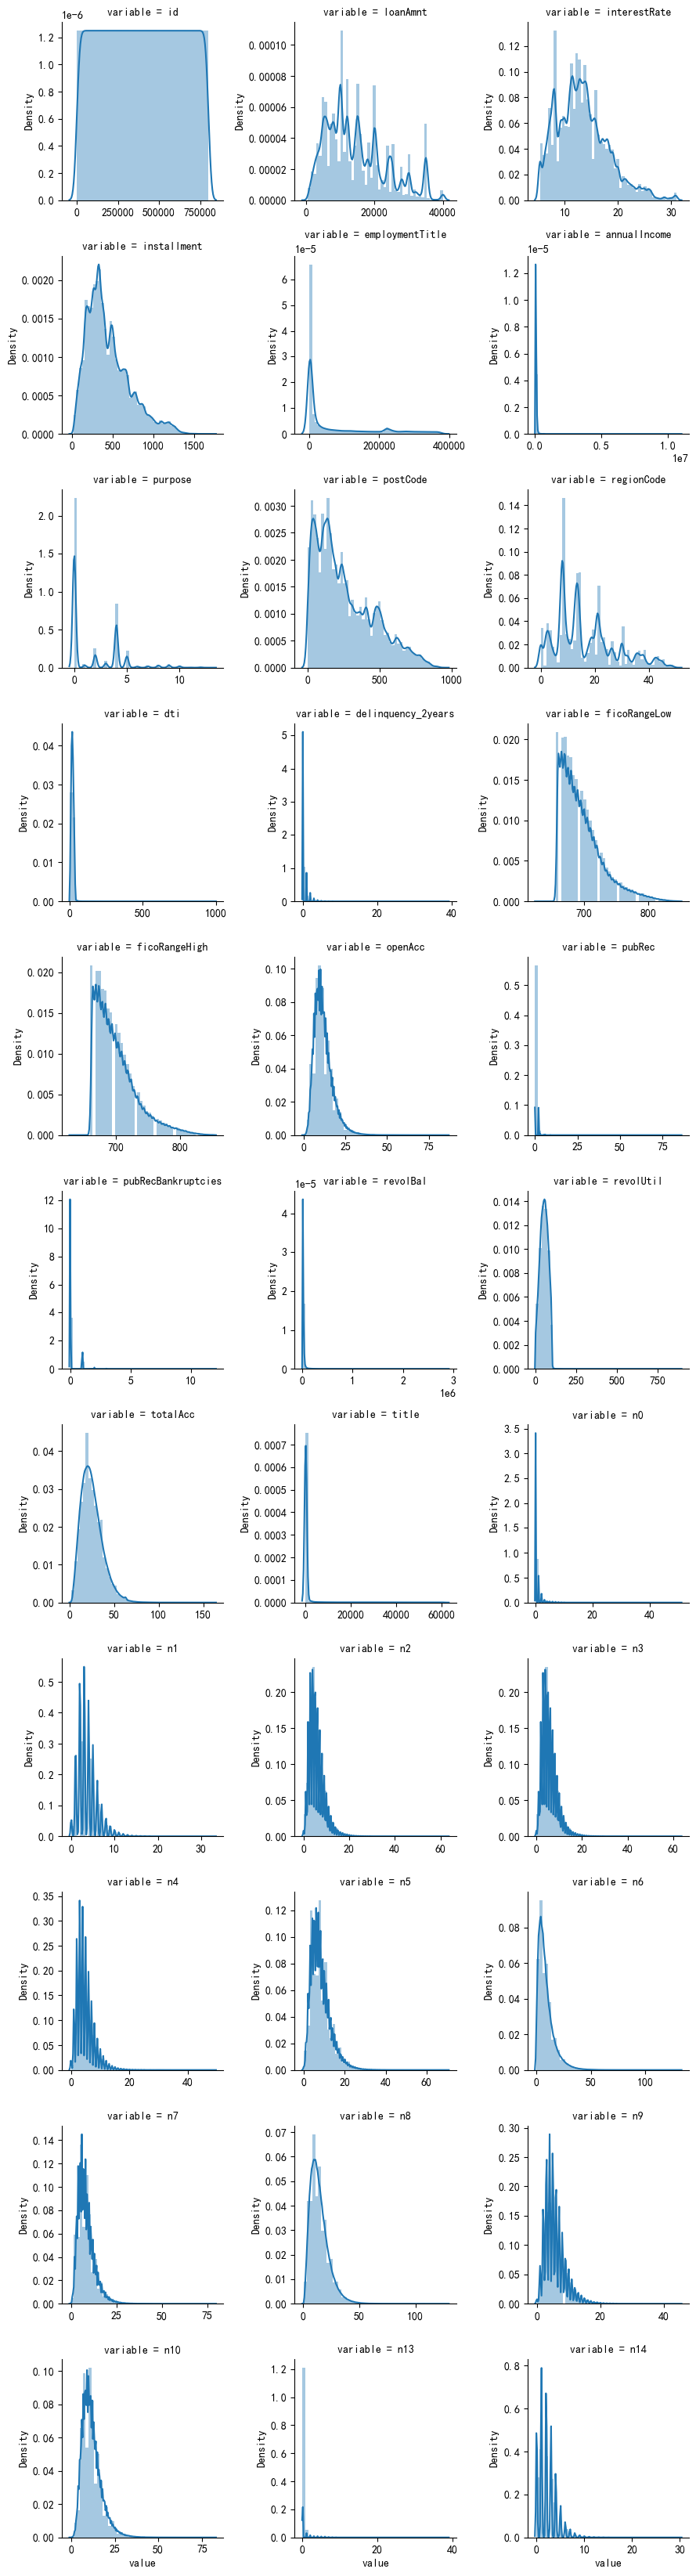

In [15]:
#每个数字特征得分布可视化
f = pd.melt(train, value_vars=serial_feature)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

Text(0.5, 0, 'loanAmnt')

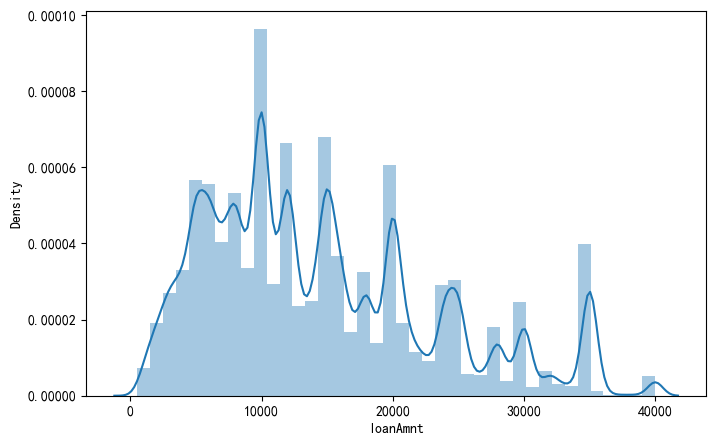

In [16]:
# 贷款金额 loanAmnt 的分布情况
plt.figure(1 , figsize = (8 , 5))
sns.distplot(train.loanAmnt,bins=40)
plt.xlabel('loanAmnt')

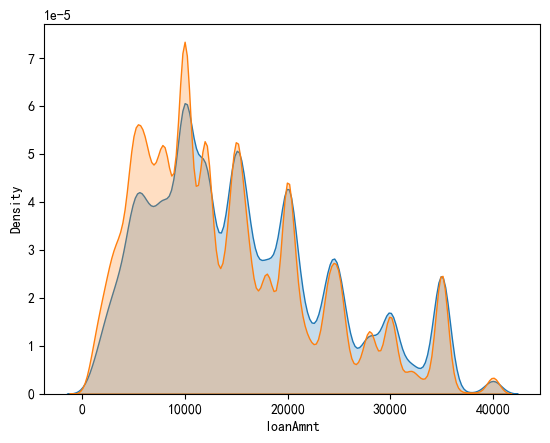

In [17]:
# 对于违约与不违约两类样本的贷款金额分布情况
label = train['isDefault']
sns.kdeplot(train.loanAmnt[label[label==1].index], label='1', shade=True)#违约
sns.kdeplot(train.loanAmnt[label[label==0].index], label='0', shade=True)#没有违约
plt.xlabel('loanAmnt')
plt.ylabel('Density');

In [18]:
# 分类型特征
categorical_features = train.select_dtypes(include=['object'])
print(categorical_features.nunique())  # 查看各分类特征的唯一值数量

grade                  7
subGrade              35
employmentLength      11
issueDate            139
earliesCreditLine    720
dtype: int64


Text(0.5, 0, 'annualIncome')

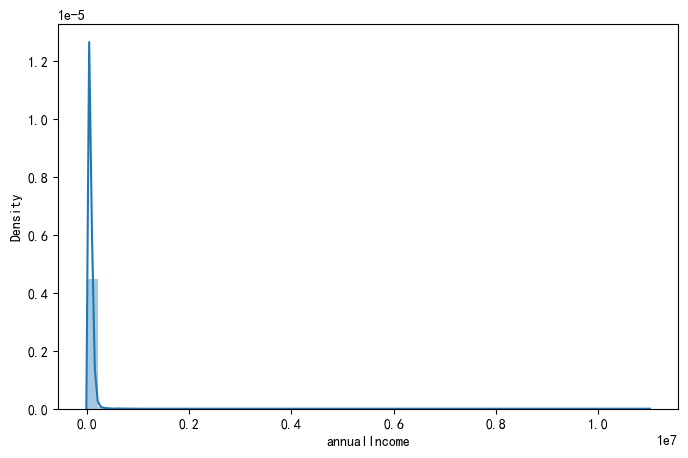

In [19]:
# 年收入的分布情况
plt.figure(1 , figsize = (8 , 5))
sns.distplot(train['annualIncome'])
plt.xlabel('annualIncome')

##### （2）离散型变量

In [20]:
discrete_feature

['term',
 'homeOwnership',
 'verificationStatus',
 'isDefault',
 'initialListStatus',
 'applicationType',
 'n11',
 'n12']

In [21]:
# 离散型变量的类型数情况
for f in discrete_feature:
    print(f, '类型数：', train[f].nunique())

term 类型数： 2
homeOwnership 类型数： 6
verificationStatus 类型数： 3
isDefault 类型数： 2
initialListStatus 类型数： 2
applicationType 类型数： 2
n11 类型数： 5
n12 类型数： 5


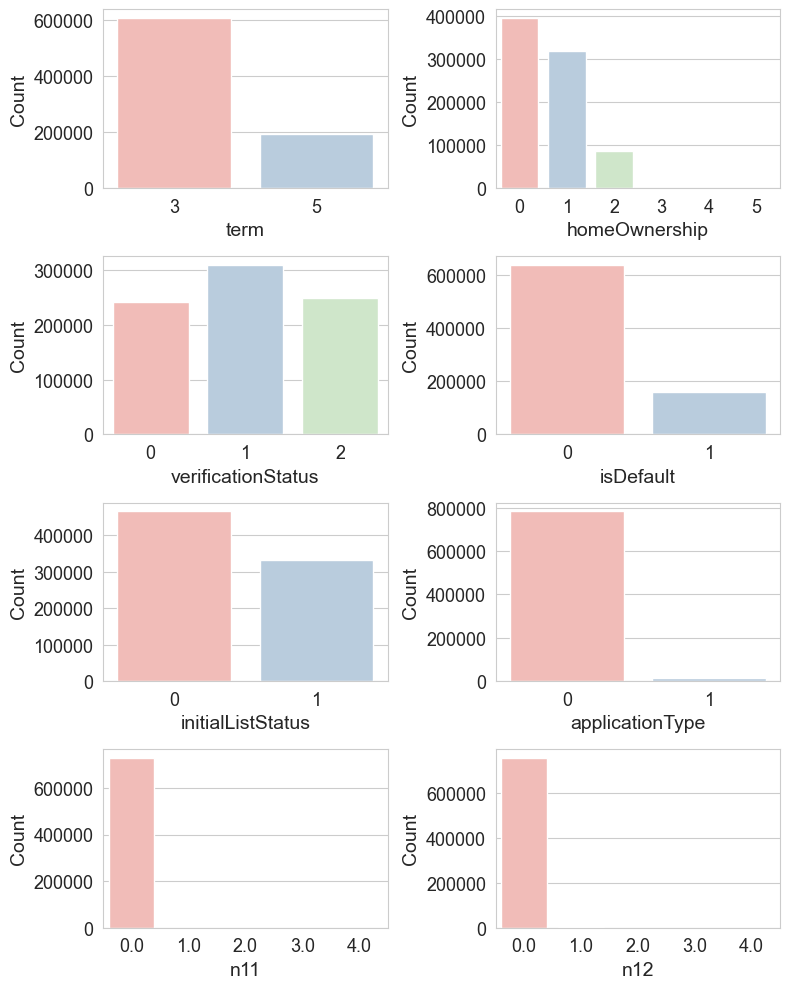

In [22]:
# 离散型特征可视化呈现
df_ = train[discrete_feature]

sns.set_style("whitegrid") # 使用whitegrid主题
fig,axes=plt.subplots(nrows=4,ncols=2,figsize=(8,10))
for i, item in enumerate(df_):
    plt.subplot(4,2,(i+1))
    #ax=df[item].value_counts().plot(kind = 'bar')
    ax=sns.countplot(x=item,data = df_,palette="Pastel1")
    plt.xlabel(str(item),fontsize=14)   
    plt.ylabel('Count',fontsize=14)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    #plt.title("Churn by "+ str(item))
    i=i+1
    plt.tight_layout()

##### （3）单值变量

In [23]:
# 单值变量表示该特征只有一种类别，对于数值全部都一样的特征，可以考虑直接删除
unique_feature

['policyCode']

#### 3.2.2 分类型特征

In [24]:
# 分类型特征
category_feature = list(filter(lambda x: x not in numerical_feature,list(train.columns)))
category_feature
# 对应info结果中的 （dtypes: float64(33), int64(9), object(5)）这里 "grade"为贷款等级，"subGrade"为贷款等级之子级，"employmentLength"为就业年限，"issueDate"为贷款发放的月份，"earliesCreditLine"为借款人最早报告的信用额度开立的月份，共有5个分类型特征。


['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

In [25]:
# 查看一下这些分类型特征的结构，后面需要对其进行特征编码
train[category_feature]

,grade,subGrade,employmentLength,issueDate,earliesCreditLine
0,E,E2,2 years,2014-07-01,Aug-2001
1,D,D2,5 years,2012-08-01,May-2002
2,D,D3,8 years,2015-10-01,May-2006
3,A,A4,10+ years,2015-08-01,May-1999
4,C,C2,NaN,2016-03-01,Aug-1977
...,...,...,...,...,...
799995,C,C4,7 years,2016-07-01,Aug-2011
799996,A,A4,10+ years,2013-04-01,May-1989
799997,C,C3,10+ years,2015-10-01,Jul-2002
799998,A,A4,10+ years,2015-02-01,Jan-1994


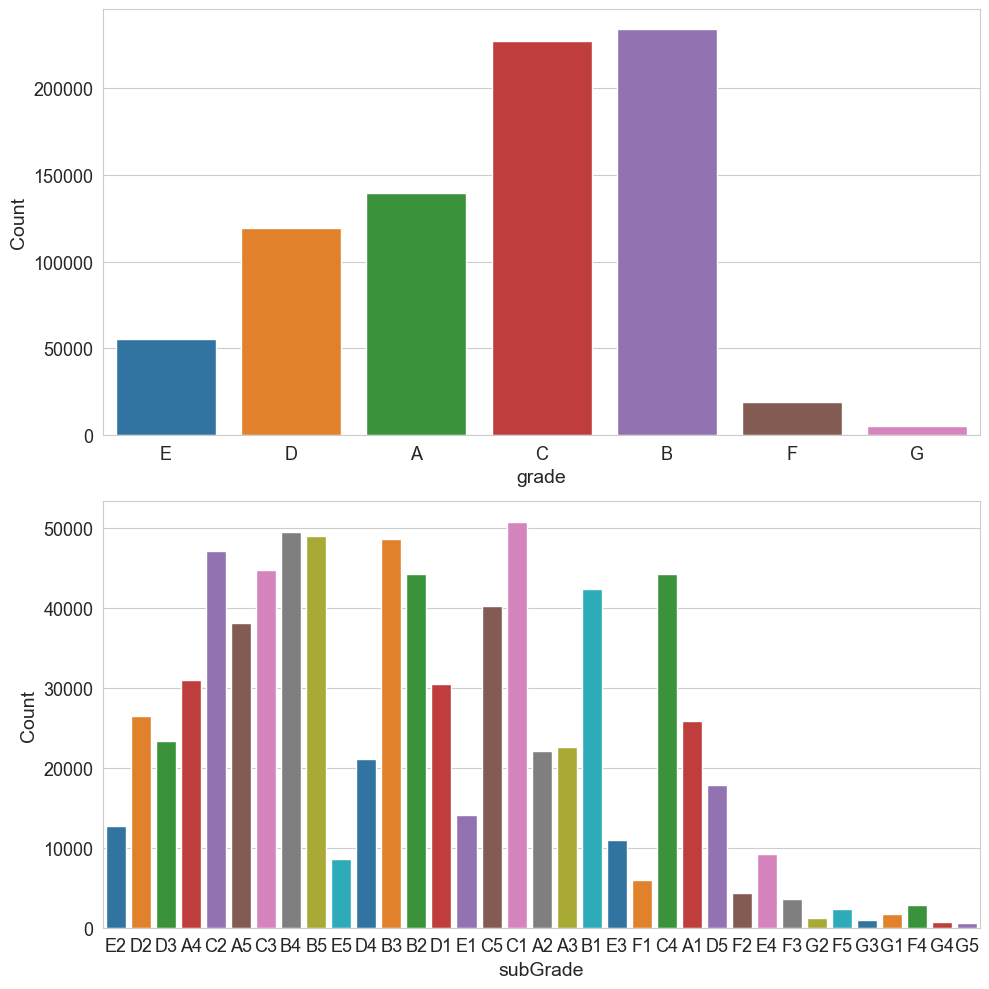

In [26]:
# 分类型特征可视化呈现
df_category = train[['grade', 'subGrade']]

sns.set_style("whitegrid") # 使用whitegrid主题
color = sns.color_palette()
fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
for i, item in enumerate(df_category):
    plt.subplot(2,1,(i+1))
    #ax=df[item].value_counts().plot(kind = 'bar')
    ax=sns.countplot(x=item,data = df_category,palette=color)
    plt.xlabel(str(item),fontsize=14)   
    plt.ylabel('Count',fontsize=14)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    #plt.title("Churn by "+ str(item))
    i=i+1
    plt.tight_layout()
plt.show()
# 可以看出对于grade特征中A\B\C等级的贷款占比比较大

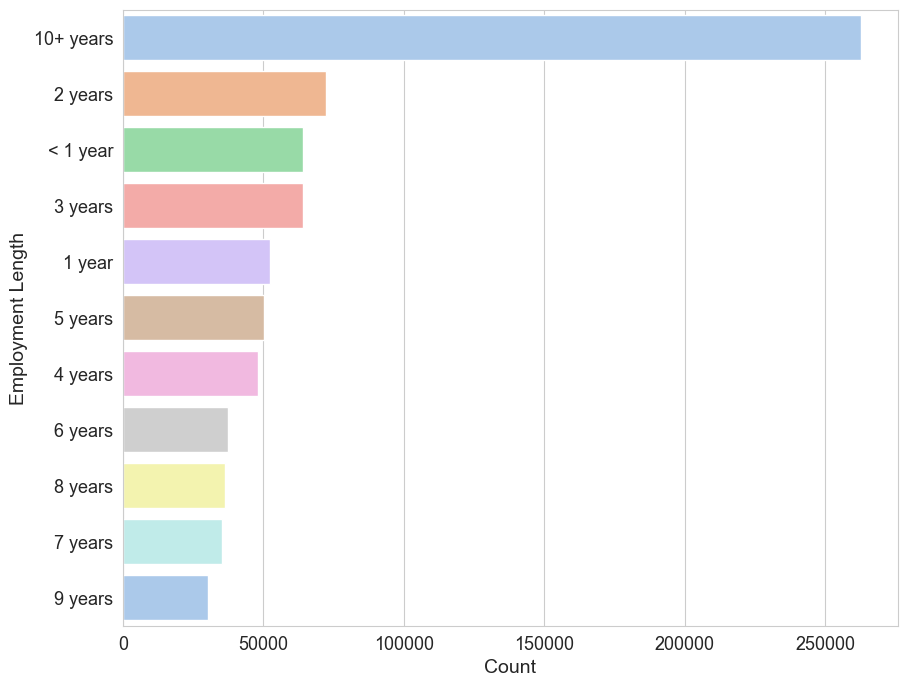

In [27]:
# employmentLength 就业年限可视化呈现
plt.figure(figsize=(10, 8))

# 将 value_counts 的结果转换为 DataFrame
employment_length_counts = train["employmentLength"].value_counts(dropna=False).reset_index()
employment_length_counts.columns = ["employmentLength", "Count"]

# 使用 barplot 绘制水平条形图
sns.barplot(y="employmentLength", x="Count", data=employment_length_counts, palette="pastel", orient='h')

# 设置标签和字体大小
plt.xlabel('Count', fontsize=14)
plt.ylabel('Employment Length', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()

In [28]:
# 对于 issueDate 与 earliesCreditLine，统计一下每个类别的数量
for i in train[['issueDate', 'earliesCreditLine']]:
    print(train[i].value_counts())
    print()

issueDate
2016-03-01    29066
2015-10-01    25525
2015-07-01    24496
2015-12-01    23245
2014-10-01    21461
              ...  
2007-08-01       23
2007-07-01       21
2008-09-01       19
2007-09-01        7
2007-06-01        1
Name: count, Length: 139, dtype: int64

earliesCreditLine
Aug-2001    5567
Sep-2003    5403
Aug-2002    5403
Oct-2001    5258
Aug-2000    5246
            ... 
Feb-1960       1
Sep-1957       1
Jul-1955       1
May-1960       1
Jan-1946       1
Name: count, Length: 720, dtype: int64



### 3.3 目标变量（标签y）的分布

In [29]:
# 查看目标变量（标签）是否平衡
# 若分类问题中各类别样本数量差距太大，则会造成样本不均衡的问题。样本不均衡不利于建立与训练出正确的模型，且不能做出合理的评估。
label=train.isDefault
label.value_counts()/len(label)

isDefault
0    0.800488
1    0.199513
Name: count, dtype: float64

数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999

findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: 

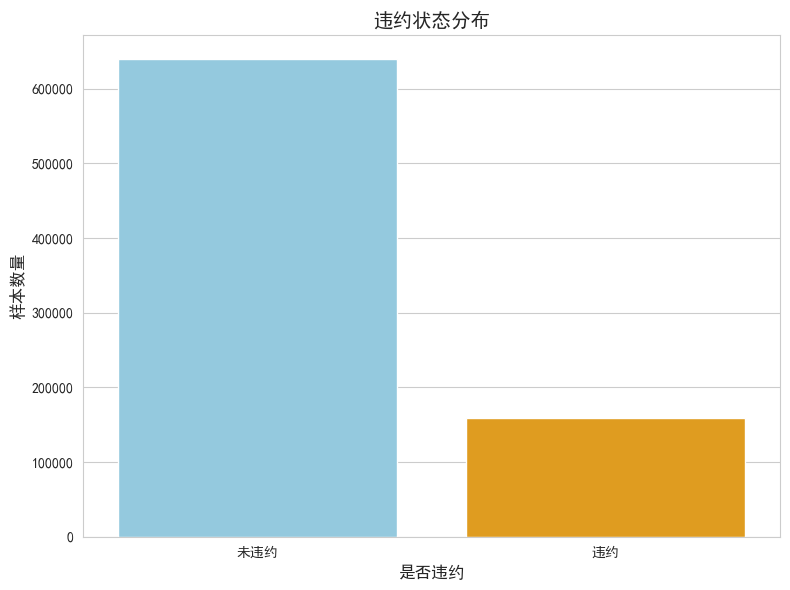

In [30]:
# 设置中文字体
plt.rcParams["font.family"] = ["SimHei", "WenQuanYi Micro Hei", "Heiti TC"]
plt.rcParams["axes.unicode_minus"] = False  # 解决负号显示问题

# 1. 检查数据基本信息
print("数据基本信息：")
train.info()

# 2. 查看列名
print("\n数据列名：")
print(train.columns)

# 3. 查找违约相关列
default_columns = [col for col in train.columns if 
                  ('default' in col.lower()) or ('违约' in col) or ('is_default' in col)]

if default_columns:
    print(f"\n找到违约相关列：{default_columns}")
    target_col = default_columns[0]
    
    # 4. 绘制分布（添加颜色定制）
    plt.figure(figsize=(8, 6))
    sns.countplot(
        x=target_col, 
        data=train,
        palette=['skyblue', 'orange']  # 蓝色=未违约，橙色=违约
    )
    plt.title('违约状态分布', fontsize=14)
    plt.xlabel('是否违约', fontsize=12)
    plt.ylabel('样本数量', fontsize=12)
    
    # 5. 自定义x轴标签（0=未违约，1=违约）
    if target_col in train.columns:
        unique_vals = train[target_col].unique()
        if len(unique_vals) == 2 and 0 in unique_vals and 1 in unique_vals:
            plt.xticks(ticks=[0, 1], labels=['未违约', '违约'], fontsize=10)
        else:
            plt.xticks(rotation=45, ha='right', fontsize=10)
    
    plt.tight_layout()
    plt.show()
else:
    print("\n错误：未找到任何违约相关列，请确认数据集是否包含该字段")

findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: 

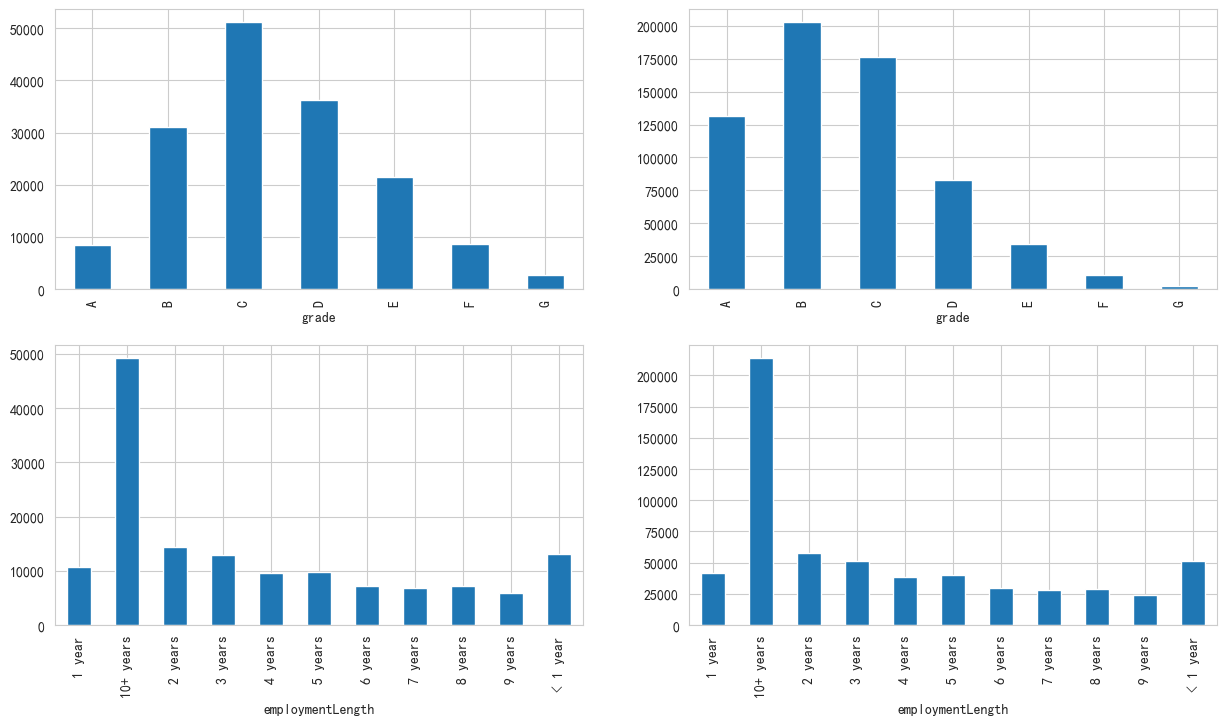

In [31]:
# 目标变量和分类类别之间的分布关系
train_loan_fr = train.loc[train['isDefault'] == 1]
train_loan_nofr = train.loc[train['isDefault'] == 0]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 8)) 
# 目标变量为1时候grade的分布
train_loan_fr.groupby("grade").size().plot.bar(ax=ax1)
# 目标变量为0时候grade的分布
train_loan_nofr.groupby("grade")["grade"].count().plot.bar(ax=ax2)
# 目标变量为1时候employmentLength的分布
train_loan_fr.groupby("employmentLength").size().plot.bar(ax=ax3)
# 目标变量为0时候employmentLength的分布
train_loan_nofr.groupby("employmentLength")["employmentLength"].count().plot.bar(ax=ax4)
plt.xticks(rotation=90);

findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: 

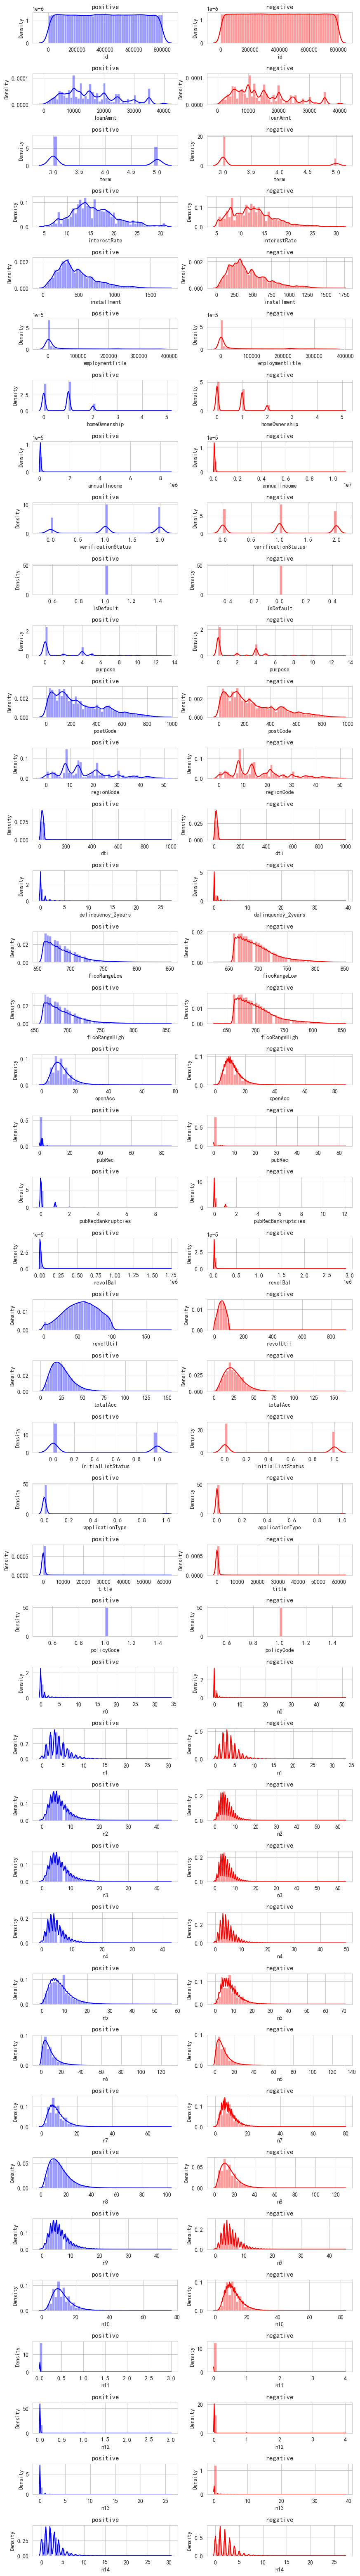

In [32]:
# 查看正负样本的数据差异
train_positve = train[train['isDefault'] == 1]
train_negative = train[train['isDefault'] != 1]
f, ax = plt.subplots(len(numerical_feature),2,figsize = (10,80))
for i,col in enumerate(numerical_feature):
    sns.distplot(train_positve[col],ax = ax[i,0],color = "blue")
    ax[i,0].set_title("positive")
    sns.distplot(train_negative[col],ax = ax[i,1],color = 'red')
    ax[i,1].set_title("negative")
plt.subplots_adjust(hspace = 1)


### 3.4 缺失值查看

In [33]:
# 缺失值查看

# 去掉标签
X_missing = train.drop(['isDefault'],axis=1)

# 查看缺失情况
missing = X_missing.isna().sum()
missing = pd.DataFrame(data={'特征': missing.index,'缺失值个数':missing.values})
#通过~取反，选取不包含数字0的行
missing = missing[~missing['缺失值个数'].isin([0])]
# 缺失比例
missing['缺失比例'] =  missing['缺失值个数']/X_missing.shape[0]
missing

,特征,缺失值个数,缺失比例
7,employmentTitle,1,0.000001
8,employmentLength,46799,0.058499
14,postCode,1,0.000001
16,dti,239,0.000299
22,pubRecBankruptcies,405,0.000506
24,revolUtil,531,0.000664
29,title,1,0.000001
31,n0,40270,0.050338
32,n1,40270,0.050338
33,n2,40270,0.050338


<Axes: >

findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: 

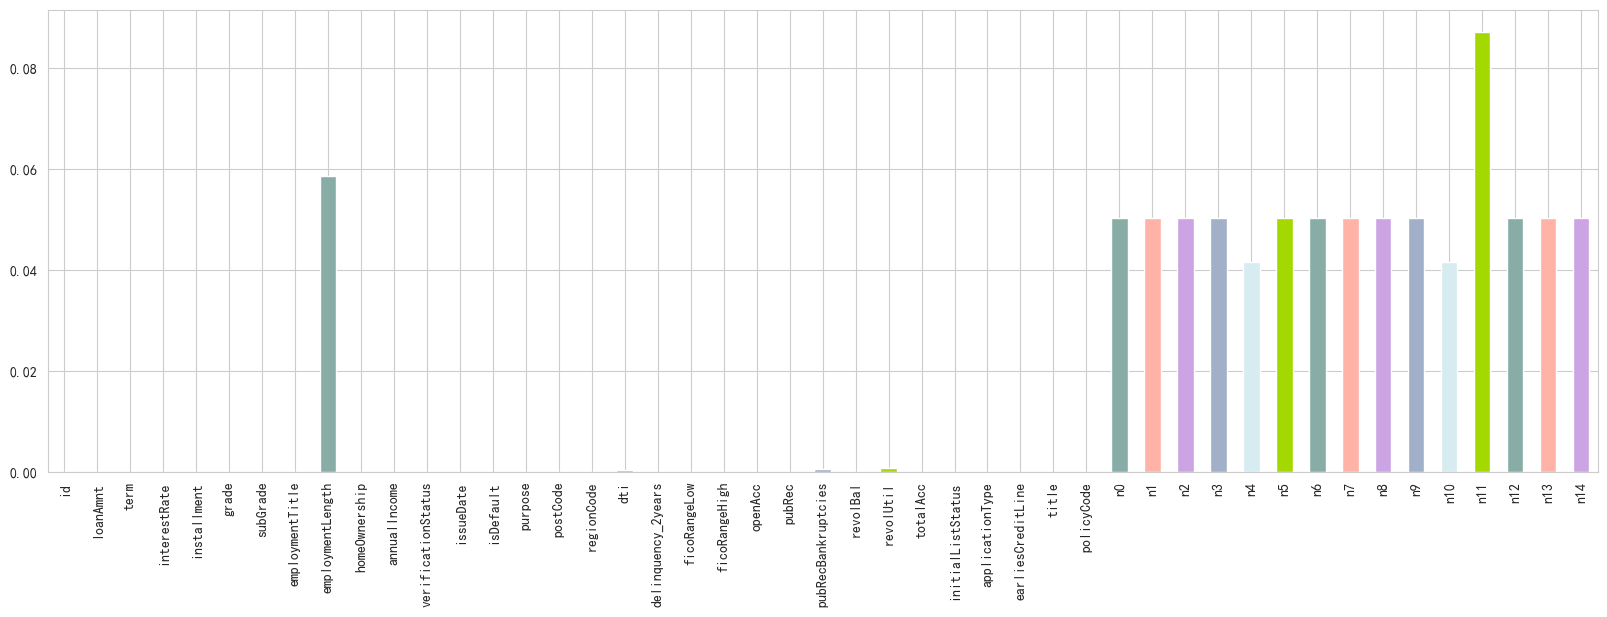

In [34]:
# 可视化
(train.isnull().sum()/len(train)).plot.bar(figsize = (20,6),color=['#d6ecf0','#a3d900','#88ada6','#ffb3a7','#cca4e3','#a1afc9'])

### 3.5 数据相关关系

findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: 

<Axes: >

findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: 

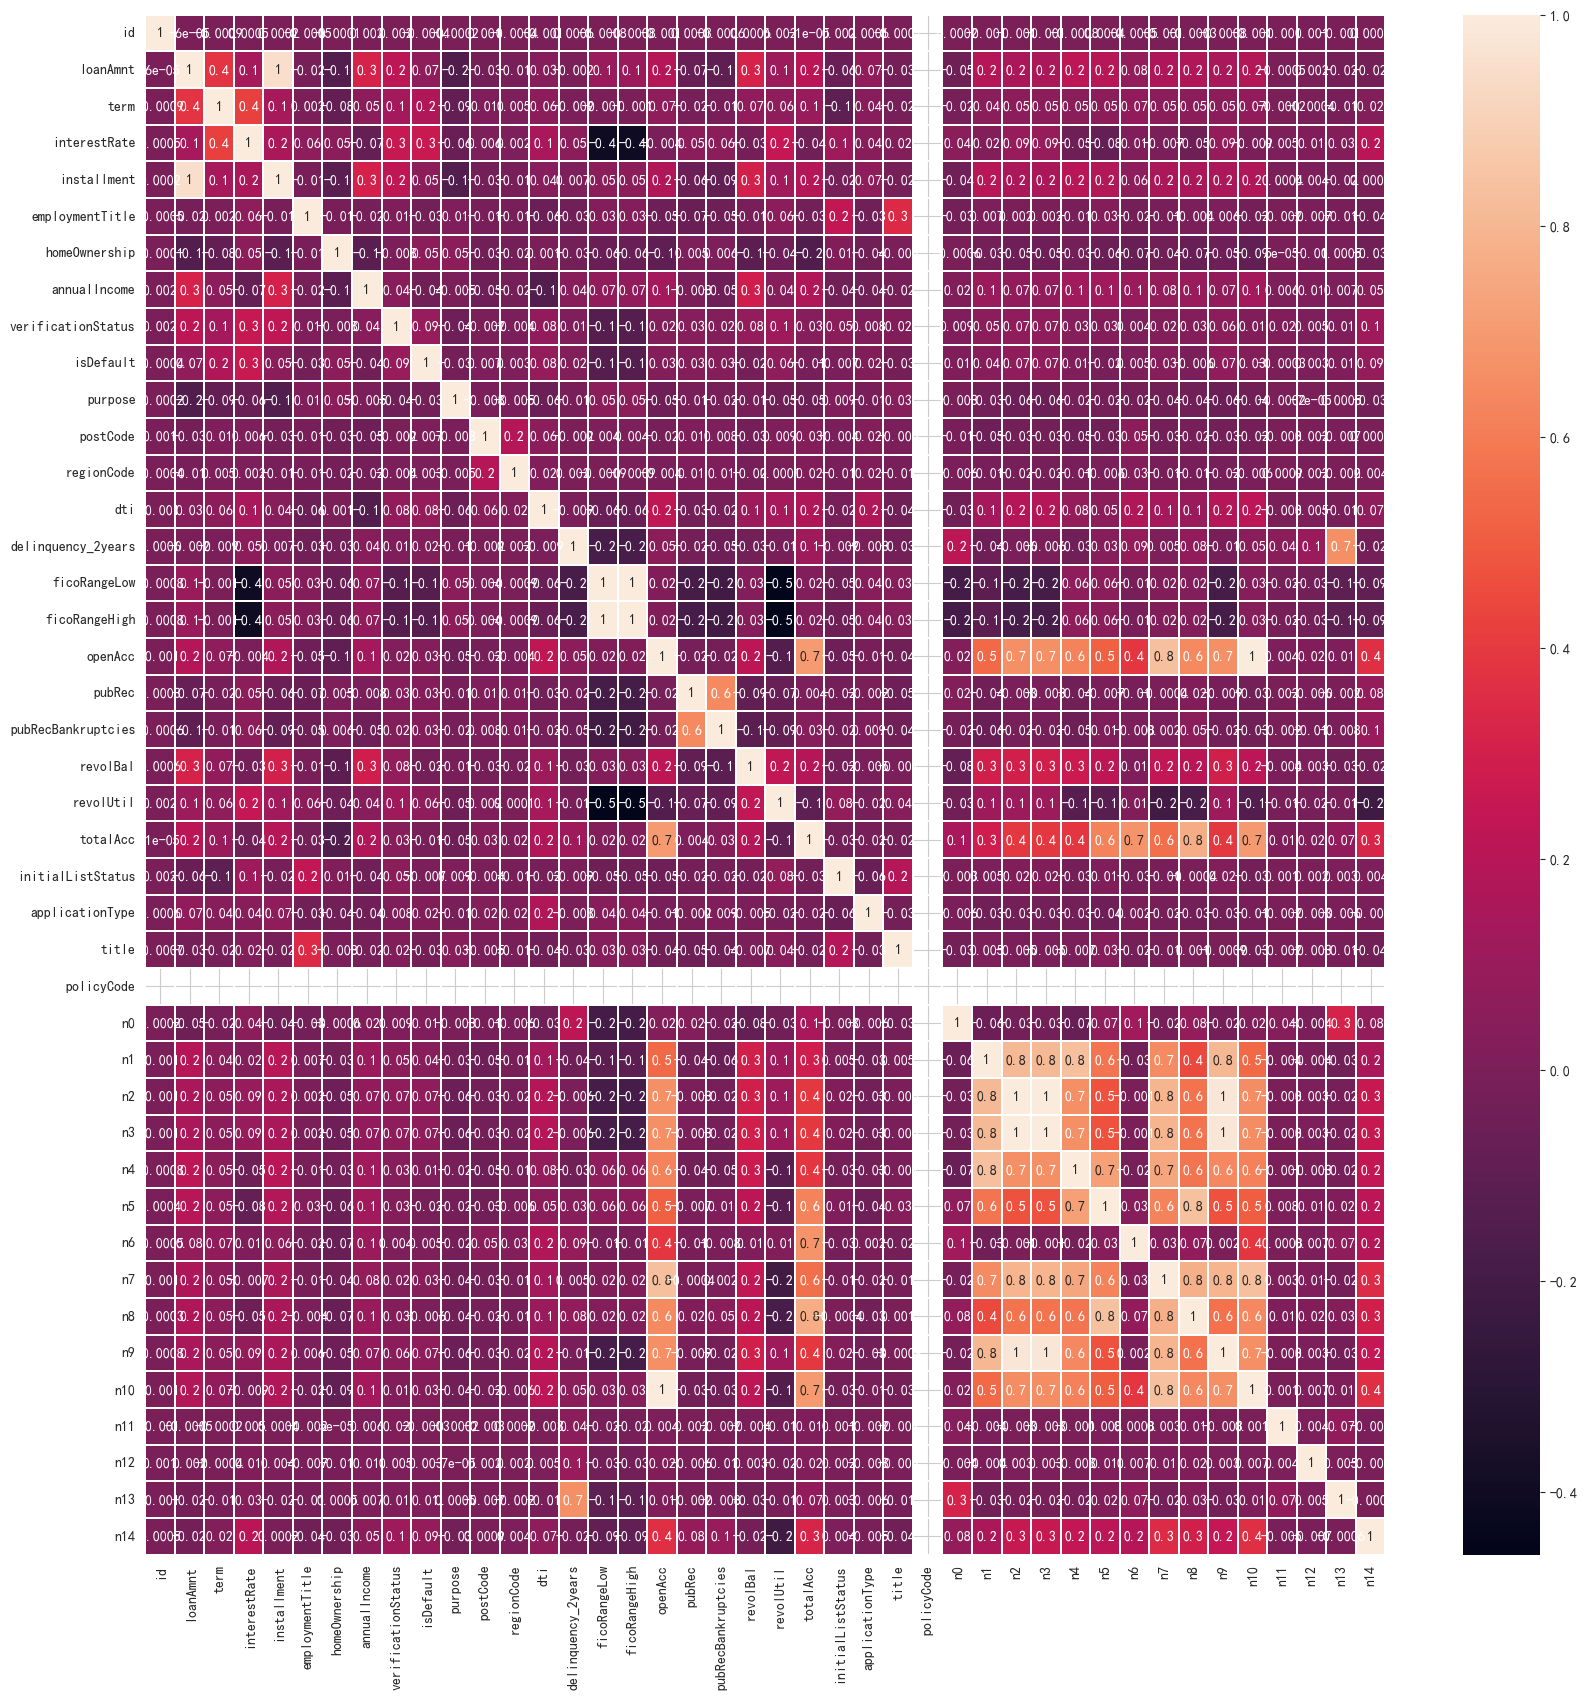

In [35]:
f, ax = plt.subplots(1,1, figsize = (20,20))
cor = train[numerical_feature].corr()
sns.heatmap(cor, annot = True, linewidth = 0.2, linecolor = "white", ax = ax, fmt =".1g" )

train.duplicated().sum()

# 四、特征工程

### 4.1 重复值处理

In [36]:
# 查看重复样本数量
duplicate_rows = train[train.duplicated()].shape[0]
print(f'重复样本数: {duplicate_rows}') 

# 删除重复样本
train = train.drop_duplicates()

重复样本数: 0


### 4.2 缺失值填补

In [37]:
# 剔除标签列
label = 'isDefault'
Y_label = train['isDefault']
numerical_feature.remove(label)

In [38]:
# 数值型特征（连续型和离散型）用中位数填补
# 训练集
train[numerical_feature] = train[numerical_feature].fillna(train[numerical_feature].median())
# 测试集
test[numerical_feature] = test[numerical_feature].fillna(train[numerical_feature].median())

In [39]:
# 分类型特征查看
train[category_feature]

,grade,subGrade,employmentLength,issueDate,earliesCreditLine
0,E,E2,2 years,2014-07-01,Aug-2001
1,D,D2,5 years,2012-08-01,May-2002
2,D,D3,8 years,2015-10-01,May-2006
3,A,A4,10+ years,2015-08-01,May-1999
4,C,C2,NaN,2016-03-01,Aug-1977
...,...,...,...,...,...
799995,C,C4,7 years,2016-07-01,Aug-2011
799996,A,A4,10+ years,2013-04-01,May-1989
799997,C,C3,10+ years,2015-10-01,Jul-2002
799998,A,A4,10+ years,2015-02-01,Jan-1994


In [40]:
# 填补
# 训练集
train[category_feature] = train[category_feature].fillna(train[category_feature].mode())
# 测试集
test[category_feature] = test[category_feature].fillna(train[category_feature].mode())

In [41]:
# 填补之后，再次查看缺失值情况
train.isnull().sum()

id                        0
loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           0
employmentLength      46799
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
isDefault                 0
purpose                   0
postCode                  0
regionCode                0
dti                       0
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies        0
revolBal                  0
revolUtil                 0
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     0
policyCode                0
n0                        0
n1                        0
n2                        0
n3                  

In [42]:
train.employmentLength

0           2 years
1           5 years
2           8 years
3         10+ years
4               NaN
            ...    
799995      7 years
799996    10+ years
799997    10+ years
799998    10+ years
799999      5 years
Name: employmentLength, Length: 800000, dtype: object

In [43]:
# 采用决策树来填补就业年限（employmentLength）
from sklearn.tree import DecisionTreeClassifier

empLenNotNullInd = train.employmentLength.notnull() # 不是空的行，返回True
columns = ['postCode','regionCode','employmentTitle','annualIncome'] # 用四个特征来预测employmentLength
train_empLen_X  = train.loc[empLenNotNullInd,columns]
train_empLen_y = train.employmentLength[empLenNotNullInd]

DTC = DecisionTreeClassifier() # 实例化
DTC.fit(train_empLen_X ,train_empLen_y) # 训练
print(DTC.score(train_empLen_X ,train_empLen_y))# 0.9809320486828881

0.9809320486828881


In [44]:
# 预测
for data in [train,test]:
    empLenIsNullInd = data.employmentLength.isnull()
    test_empLen_X  = data.loc[empLenIsNullInd,columns]
    empLen_pred = DTC.predict(test_empLen_X)
    data.employmentLength[empLenIsNullInd] = empLen_pred

In [45]:
# 填补完毕
train.isnull().any().sum()

0

In [46]:
train['employmentLength'][:20]

0       2 years
1       5 years
2       8 years
3     10+ years
4       5 years
5       7 years
6       9 years
7        1 year
8       5 years
9       6 years
10    10+ years
11      3 years
12      2 years
13    10+ years
14      2 years
15      2 years
16      9 years
17     < 1 year
18    10+ years
19      9 years
Name: employmentLength, dtype: object

In [47]:
train['employmentLength'].value_counts(dropna=False).sort_index()

employmentLength
1 year        55289
10+ years    277003
2 years       76652
3 years       68771
4 years       50869
5 years       54001
6 years       39404
7 years       37203
8 years       37927
9 years       31443
< 1 year      71438
Name: count, dtype: int64

### 4.3 异常值处理

异常值的存在很可能会影响模型的最终结果，但是当我们发现异常值的时候也不能马上就删除，应该先看看这个异常值是不是有特殊原因造成的，特别是在金融风控问题中，异常值的出现往往是存在意义的。

如果不是因为特殊原因造成的，可以先观察这个异常值出现的频率

若异常值只出现了一次，多半是输入错误，直接把异常值删除即可

若异常值出现了多次，可以和业务人员沟通，可能这是某种特殊表示，如果是人为造成的错误，留着是没有用，只要数据量不是太大，都可以删除

若异常值占到总数据量的10%以上，不能轻易删除。可以考虑把异常值替换成非异常但是非干扰的项，比如说用0来进行替换，或者把异常当缺失值，用均值或者众数来进行替换

通常，在进行EDA的时候会利用描述统计的方法，查看特征的均值、极大值、极小值等信息，结合常识来判断是否存在异常值。


#### 4.3.1 方法一：均方差 3σ

In [48]:
def find_outliers_by_3segama(data,fea):
    data_std = np.std(data[fea])
    data_mean = np.mean(data[fea])
    outliers_cut_off = data_std * 3
    lower_rule = data_mean - outliers_cut_off
    upper_rule = data_mean + outliers_cut_off
    data[fea+'_outliers'] = data[fea].apply(lambda x:str('异常值') if x > upper_rule or x < lower_rule else '正常值')
    return data

In [49]:
data_train = train.copy()
for fea in numerical_feature:
    data_train = find_outliers_by_3segama(data_train,fea)
    print(data_train[fea+'_outliers'].value_counts())
    print(data_train.groupby(fea+'_outliers')['isDefault'].sum())
    print('*'*10)

id_outliers
正常值    800000
Name: count, dtype: int64
id_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
loanAmnt_outliers
正常值    800000
Name: count, dtype: int64
loanAmnt_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
term_outliers
正常值    800000
Name: count, dtype: int64
term_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
interestRate_outliers
正常值    794259
异常值      5741
Name: count, dtype: int64
interestRate_outliers
异常值      2916
正常值    156694
Name: isDefault, dtype: int64
**********
installment_outliers
正常值    792046
异常值      7954
Name: count, dtype: int64
installment_outliers
异常值      2152
正常值    157458
Name: isDefault, dtype: int64
**********
employmentTitle_outliers
正常值    800000
Name: count, dtype: int64
employmentTitle_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
homeOwnership_outliers
正常值    799701
异常值       299
Name: count, dtype: int64
homeOwnership_outliers
异常值        62
正常值    159548
Name: isDefault, dtype

### 4.4 时间数据处理

In [50]:
train['issueDate']

0         2014-07-01
1         2012-08-01
2         2015-10-01
3         2015-08-01
4         2016-03-01
             ...    
799995    2016-07-01
799996    2013-04-01
799997    2015-10-01
799998    2015-02-01
799999    2018-08-01
Name: issueDate, Length: 800000, dtype: object

In [51]:
train.shape # (800000, 47)

(800000, 47)

In [52]:
# 训练集时间数据处理
import datetime
# 转化成时间格式 issueDateDT特征表示数据日期离数据集中日期最早的日期（2007-06-01）的天数
train['issueDate'] = pd.to_datetime(train['issueDate'],format='%Y-%m-%d')
startdate = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
train['issueDateDT'] = train['issueDate'].apply(lambda x: x-startdate).dt.days

train.shape # (800000, 48)

(800000, 48)

In [53]:
# 查看一下处理效果
train[['issueDate','issueDateDT']]

,issueDate,issueDateDT
0,2014-07-01,2587
1,2012-08-01,1888
2,2015-10-01,3044
3,2015-08-01,2983
4,2016-03-01,3196
...,...,...
799995,2016-07-01,3318
799996,2013-04-01,2131
799997,2015-10-01,3044
799998,2015-02-01,2802


In [54]:
# 测试集时间数据处理
# 转化成时间格式
test['issueDate'] = pd.to_datetime(train['issueDate'],format='%Y-%m-%d')
startdate = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
test['issueDateDT'] = test['issueDate'].apply(lambda x: x-startdate).dt.days

findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: 

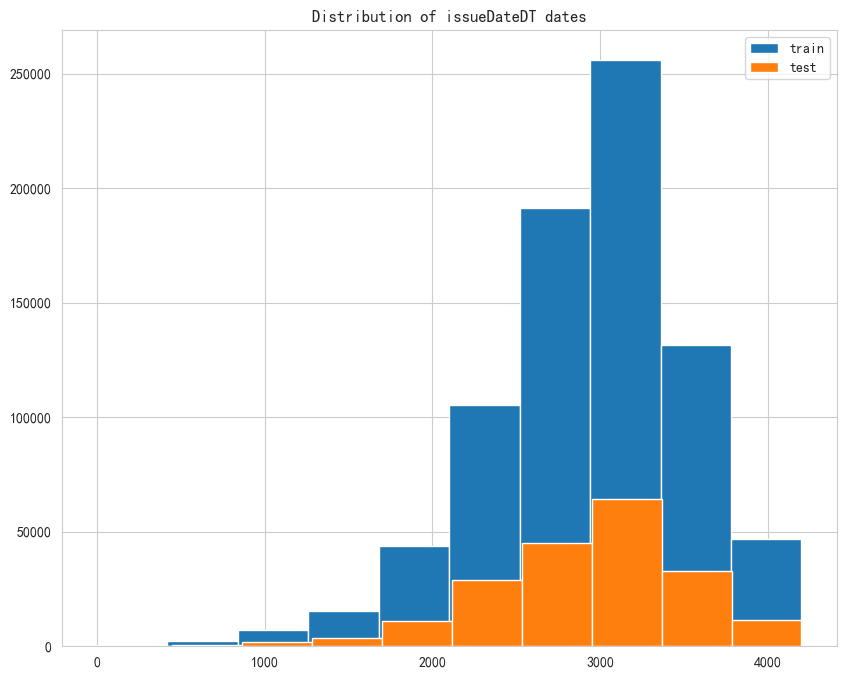

In [55]:
# 可视化
plt.figure(1 , figsize = (10 , 8))
plt.hist(train['issueDateDT'], label='train');
plt.hist(test['issueDateDT'], label='test');
plt.legend();
plt.title('Distribution of issueDateDT dates');
#train 和 test issueDateDT 日期有重叠 所以使用基于时间的分割进行验证是不明智的

### 4.5 特征交叉

In [56]:
train[['issueDate','earliesCreditLine']]

,issueDate,earliesCreditLine
0,2014-07-01,Aug-2001
1,2012-08-01,May-2002
2,2015-10-01,May-2006
3,2015-08-01,May-1999
4,2016-03-01,Aug-1977
...,...,...
799995,2016-07-01,Aug-2011
799996,2013-04-01,May-1989
799997,2015-10-01,Jul-2002
799998,2015-02-01,Jan-1994


In [57]:
train_earliesCreditLine_year = train['earliesCreditLine'].apply(lambda x:x[-4:]).astype('int64')
test_earliesCreditLine_year = test['earliesCreditLine'].apply(lambda x:x[-4:]).astype('int64')

train_issueDate_year = train['issueDate'].astype('str').apply(lambda x:x[:4]).astype('int64')
test_issueDate_year = test['issueDate'].astype('str').apply(lambda x:x[:4]).astype('int64')

train['CreditLine'] = train_issueDate_year - train_earliesCreditLine_year
test['CreditLine'] = test_issueDate_year - test_earliesCreditLine_year

train = train.drop(['earliesCreditLine','issueDate'],axis=1)
test = test.drop(['earliesCreditLine','issueDate'],axis=1)

In [58]:
# 查看处理结果
train['CreditLine']

0         13
1         10
2          9
3         16
4         39
          ..
799995     5
799996    24
799997    13
799998    21
799999    16
Name: CreditLine, Length: 800000, dtype: int64

In [59]:
train.shape ## (800000, 47)

(800000, 47)

### 4.6 特征编码

In [60]:
# 将 employmentLength 进行简单的处理，再进行编码
def employmentLength_to_int(s):
    if pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])
for data in [train, test]:
    data['employmentLength'].replace(to_replace='10+ years', value='10 years', inplace=True)
    data['employmentLength'].replace('< 1 year', '0 years', inplace=True)
    data['employmentLength'] = data['employmentLength'].apply(employmentLength_to_int)

In [61]:
# 处理前效果
train['employmentLength'][:20]

0      2
1      5
2      8
3     10
4      5
5      7
6      9
7      1
8      5
9      6
10    10
11     3
12     2
13    10
14     2
15     2
16     9
17     0
18    10
19     9
Name: employmentLength, dtype: int8

In [62]:
# 处理后效果
train['employmentLength']

0          2
1          5
2          8
3         10
4          5
          ..
799995     7
799996    10
799997    10
799998    10
799999     5
Name: employmentLength, Length: 800000, dtype: int8

In [63]:
# 对其余分类型特征进行编码
a2z = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
a2z_code = np.arange(1,27)
a2z_mapping = dict(zip(a2z, a2z_code))

for data in [train,test]:
    data.loc[:,['grade','subGrade']] = data.loc[:,['grade','subGrade']].applymap(lambda g:g.replace(g[0], str(a2z.index(g[0])+1))).astype('int')

In [64]:
# 编码前结果
train[['grade','subGrade']]

,grade,subGrade
0,5,52
1,4,42
2,4,43
3,1,14
4,3,32
...,...,...
799995,3,34
799996,1,14
799997,3,33
799998,1,14


In [65]:
# 编码后结果
train[['grade','subGrade']]

,grade,subGrade
0,5,52
1,4,42
2,4,43
3,1,14
4,3,32
...,...,...
799995,3,34
799996,1,14
799997,3,33
799998,1,14


In [66]:
# 对于离散型特征，可以使用OneHotEncoder独热编码，要处理的特征有：
train[['homeOwnership','verificationStatus','purpose']]

,homeOwnership,verificationStatus,purpose
0,2,2,1
1,0,2,0
2,0,2,0
3,1,1,4
4,1,2,10
...,...,...,...
799995,1,0,0
799996,0,2,4
799997,1,2,0
799998,0,2,4


In [67]:
# 编码之前确定一下特征数
train.shape # (800000, 47)

(800000, 47)

In [68]:
# 独热编码
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder(sparse_output=False)
oh.fit(train[['homeOwnership','verificationStatus','purpose']])
OneHot1 = oh.transform(train[['homeOwnership','verificationStatus','purpose']])
OneHot2 = oh.transform(test[['homeOwnership','verificationStatus','purpose']])

OneHot1.shape# (800000, 23)
'''
array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])
'''

train = pd.concat([train, pd.DataFrame(OneHot1)], axis=1)
test = pd.concat([test, pd.DataFrame(OneHot2)], axis=1)

train = train.drop(['homeOwnership','verificationStatus','purpose'],axis=1)
test = test.drop(['homeOwnership','verificationStatus','purpose'],axis=1)

train.shape # (800000, 67)

(800000, 67)

### 4.7 数据分桶

In [69]:
# 固定宽度分箱
# 通过除法映射到间隔均匀的分箱中，每个分箱的取值范围都是loanAmnt/1000
train['loanAmnt_bin1'] = np.floor_divide(train['loanAmnt'], 1000)
## 通过对数函数映射到指数宽度分箱
train['loanAmnt_bin2'] = np.floor(np.log10(train['loanAmnt']))

In [70]:
# 分位数分箱
train['loanAmnt_bin3'] = pd.qcut(train['loanAmnt'], 10, labels=False)

### 4.8 特征选择

In [71]:
# 1.人工判断与目标无关联特征为"id"，需删除
train=train.drop(["id"],axis=1) 
train.shape # (800000, 66)

(800000, 69)

In [72]:
test=test.drop(["id"],axis=1) 
test.shape # (200000, 65)

(200000, 65)

In [73]:
# 2.求出各个特征与目标的相关系数，综合考虑排除corr小于0.01的特征
train.corr()["isDefault"].sort_values()

ficoRangeLow    -0.130994
ficoRangeHigh   -0.130993
6               -0.085972
0               -0.069264
annualIncome    -0.042782
                   ...   
interestRate     0.259202
grade            0.261858
subGrade         0.266415
isDefault        1.000000
policyCode            NaN
Name: isDefault, Length: 69, dtype: float64

In [74]:
train=train.drop(["initialListStatus","n5","n11","n12","n8","postCode","policyCode"],axis=1)
test=test.drop(["initialListStatus","n5","n11","n12","n8","postCode","policyCode"],axis=1)

train.shape# (800000, 59)

(800000, 62)

In [75]:
# 3.特征间高相关过滤
# 显示相关性高于0.6的变量
def getHighRelatedFeatureDf(corr_matrix, corr_threshold):
    highRelatedFeatureDf = pd.DataFrame(corr_matrix[corr_matrix>corr_threshold].stack().reset_index())
    highRelatedFeatureDf.rename({'level_0':'feature_x', 'level_1':'feature_y', 0:'corr'}, axis=1, inplace=True)
    highRelatedFeatureDf = highRelatedFeatureDf[highRelatedFeatureDf.feature_x != highRelatedFeatureDf.feature_y]
    highRelatedFeatureDf['feature_pair_key'] = highRelatedFeatureDf.loc[:,['feature_x', 'feature_y']].apply(lambda r:'#'.join(np.sort(r.values)), axis=1)
    highRelatedFeatureDf.drop_duplicates(subset=['feature_pair_key'],inplace=True)
    highRelatedFeatureDf.drop(['feature_pair_key'], axis=1, inplace=True)
    return highRelatedFeatureDf

getHighRelatedFeatureDf(train.corr(),0.6)

,feature_x,feature_y,corr
1,loanAmnt,installment,0.953369
2,loanAmnt,loanAmnt_bin1,0.999522
3,loanAmnt,loanAmnt_bin2,0.698767
4,loanAmnt,loanAmnt_bin3,0.956355
7,interestRate,grade,0.953269
8,interestRate,subGrade,0.970847
11,installment,loanAmnt_bin1,0.952649
12,installment,loanAmnt_bin2,0.659533
13,installment,loanAmnt_bin3,0.909311
16,grade,subGrade,0.993907


结果分析：
1） "loanAmnt"贷款金额，"installment"分期付款金额两个特征间相关系数为0.95

2）"ficoRangeLow"fico所属的下限范围，"ficoRangeHigh"fico所属的上限范围两个特征间相关系数为1

3）"openAcc"未结信用额度的数量，“n10” 两个特征间相关系数为0.93

4）“n3”，"n2"两个特征间相关系数为1；“n3”，“n9” 两个特征间相关系数为0.98

根据高相关特征，综合考虑他们与目标的相关性，删除特征"installment",“ficoRangeHigh”,“openAcc”,“n3”,“n9”

In [76]:
col = ['installment','ficoRangeHigh','openAcc','n3','n9']
for data in [train,test]:
    data.drop(col,axis=1,inplace=True)

In [77]:
train.shape # (800000, 54)

(800000, 57)

In [78]:
# 4.低方差过滤
train.var().sort_values()

4                               0.000041
5                               0.000101
3                               0.000231
22                              0.000237
20                              0.000692
21                              0.001701
15                              0.005413
16                              0.006671
19                              0.007015
17                              0.010704
10                              0.011253
18                              0.011414
applicationType                 0.018896
12                              0.021491
14                              0.054499
11                              0.060915
2                               0.096247
pubRecBankruptcies              0.142421
isDefault                       0.159707
13                              0.171203
6                               0.210609
8                               0.214359
loanAmnt_bin2                   0.224171
7                               0.237291
1               

In [79]:
# 结合相关性过滤方差小于0.1的特征"applicationType"
col = ['applicationType']
for data in [train,test]:
    data.drop(col,axis=1,inplace=True)

In [80]:
train.shape  # (800000, 53)

(800000, 56)

### 4.9 样本不平衡处理

In [81]:
# 方法1：直接使用列名提取数据
if 'isDefault' in train.columns:
    label_series = train['isDefault']
else:
    raise ValueError("数据集中不存在'isDefault'列")

# 计算违约率分布（归一化）
default_rate = label_series.value_counts(normalize=True)

# 显示结果
print("违约率分布：")
print(default_rate)

# 方法2：使用变量label
label = 'isDefault'
if label in train.columns:
    label_series = train[label]
    default_rate = label_series.value_counts(normalize=True)
    print(f"\n通过变量label计算的违约率：")
    print(default_rate)
else:
    print(f"错误：数据集中不存在'{label}'列")

违约率分布：
isDefault
0    0.800488
1    0.199513
Name: proportion, dtype: float64

通过变量label计算的违约率：
isDefault
0    0.800488
1    0.199513
Name: proportion, dtype: float64


# 五、建模分析

### 5.1 LightGBM

In [82]:
X = train.drop(['isDefault'], axis=1)
y = train.loc[:,'isDefault']

kf = KFold(n_splits=5, shuffle=True, random_state=525)
X_train_split, X_val, y_train_split, y_val = train_test_split(X, y, test_size=0.2)


In [83]:
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

# 假设 X 和 y 是你的特征和目标变量
# X = ...
# y = ...

# 对分类变量进行编码
label_encoders = {}
for col in ['grade', 'subGrade']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

kf = KFold(n_splits=5, shuffle=True, random_state=525)
cv_scores = []

for i, (train_index, val_index) in enumerate(kf.split(X, y)):
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_val, y_val = X.iloc[val_index], y.iloc[val_index]
    
    train_matrix = lgb.Dataset(X_train, label=y_train)
    valid_matrix = lgb.Dataset(X_val, label=y_val)

    params = {
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'learning_rate': 0.1,
        'metric': 'auc',
        'min_child_weight': 1e-3,
        'num_leaves': 31,
        'max_depth': -1,
        'seed': 525,
        'nthread': 8,
        'silent': True,
    }
    
    # 定义早停回调函数
    early_stopping_rounds = 200
    callbacks = [lgb.early_stopping(stopping_rounds=early_stopping_rounds, first_metric_only=True)]

    model = lgb.train(params, train_set=train_matrix, num_boost_round=20000, valid_sets=[valid_matrix], valid_names=['valid'], callbacks=callbacks)
    val_pred = model.predict(X_val, num_iteration=model.best_iteration)
    
    cv_scores.append(roc_auc_score(y_val, val_pred))
    print(cv_scores)

print("lgb_score_list:{}".format(cv_scores))
print("lgb_score_mean:{}".format(np.mean(cv_scores)))
print("lgb_score_std:{}".format(np.std(cv_scores)))

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 127720, number of negative: 512280
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.116390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2999
[LightGBM] [Info] Number of data points in the train set: 640000, number of used features: 55
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.199563 -> initscore=-1.389031
[LightGBM] [Info] Start training from score -1.389031
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[580]	valid's auc: 0.735259
Evaluated only: auc
[0.7352592040603629]
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 

AUC：0.7341150346103942


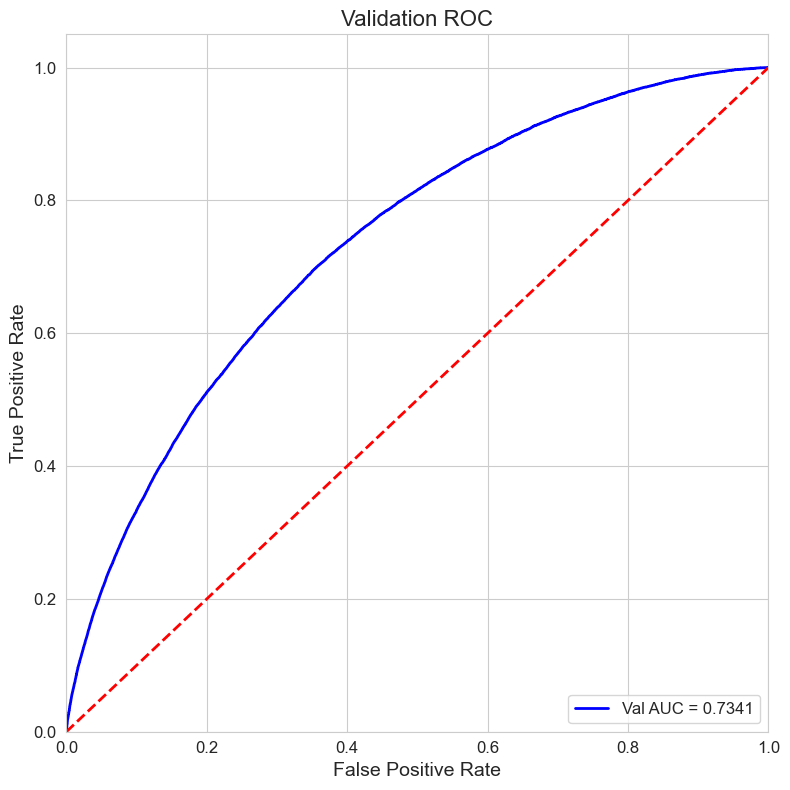

In [84]:
# ROC曲线
from sklearn import metrics
from sklearn.metrics import roc_auc_score

al_pre_lgb = model.predict(X_val, num_iteration=model.best_iteration)
fpr, tpr, threshold = metrics.roc_curve(y_val, val_pred)
roc_auc = metrics.auc(fpr, tpr)
print('AUC：{}'.format(roc_auc))

# 绘制 ROC 曲线
plt.figure(figsize=(8, 8))
sns.set_style("whitegrid")  # 设置背景网格样式
plt.title('Validation ROC', fontsize=16)  # 设置标题
plt.plot(fpr, tpr, color='blue', lw=2, label='Val AUC = {:.4f}'.format(roc_auc))  # 绘制 ROC 曲线
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # 绘制对角线
plt.xlim([0.0, 1.0])  # 设置 x 轴范围
plt.ylim([0.0, 1.05])  # 设置 y 轴范围
plt.xlabel('False Positive Rate', fontsize=14)  # 设置 x 轴标签
plt.ylabel('True Positive Rate', fontsize=14)  # 设置 y 轴标签
plt.legend(loc='lower right', fontsize=12)  # 设置图例位置和字体大小
plt.xticks(fontsize=12)  # 设置 x 轴刻度字体大小
plt.yticks(fontsize=12)  # 设置 y 轴刻度字体大小
plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()


### 5.2 XGBoost

In [85]:
X = train.drop(['isDefault'], axis=1)
y = train.loc[:,'isDefault']

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)

In [86]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# 对分类变量进行编码
label_encoders = {}
for col in ['grade', 'subGrade']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# 划分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化 XGBoost 分类器
clf1 = xgb.XGBClassifier(n_jobs=-1)

# 训练模型
clf1.fit(Xtrain, Ytrain)

# 预测测试集
Ypred = clf1.predict(Xtest)

# 计算准确率
accuracy = accuracy_score(Ytest, Ypred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8077


In [87]:
from xgboost.sklearn import XGBClassifier
clf1 = XGBClassifier(n_jobs=-1)
clf1.fit(Xtrain,Ytrain)
clf1.score(Xtest,Ytest)


0.80770625

In [88]:
# 计算模型结构的AUC面积
from sklearn.metrics import roc_curve, auc

predict_proba = clf1.predict_proba(Xtest)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Ytest, predict_proba[:,1])
auc(false_positive_rate, true_positive_rate)


0.7322506630540129

### 5.3 三个模型比较

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# 确保所有特征名称都是字符串类型
X.columns = X.columns.astype(str)

# 初始化模型
gra = GradientBoostingClassifier()
xgb = XGBClassifier()
lgb = LGBMClassifier()

models = [gra, xgb, lgb]
model_names = ["gra", "xgb", "lgb"]

# 交叉验证看看上述3个算法评分
for i, model in enumerate(models):
    score = cross_val_score(model, X, y, cv=5, scoring="accuracy", n_jobs=-1)
    print(model_names[i], np.array(score).round(3), round(score.mean(), 3))

gra [0.805 0.805 0.805 0.805 0.805] 0.805
xgb [0.807 0.806 0.806 0.806 0.806] 0.806
lgb [0.807 0.806 0.807 0.807 0.806] 0.807


# 六、模型调参

### 6.1 贪心调参

In [90]:
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMRegressor
import numpy as np

# 定义需要优化的参数范围
objective = ['regression', 'regression_l1', 'huber', 'fair']  # 回归问题的目标函数
num_leaves = [10, 20, 30, 40, 50]  # 叶子节点数量
max_depth = [3, 4, 5, 6, 7]  # 树的最大深度

# 假设X_train和y_train已经定义
# X_train, y_train = ...

# 调objective
best_obj = dict()
for obj in objective:
    model = LGBMRegressor(objective=obj)
    # 对于回归问题，使用neg_mean_squared_error等回归指标
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    best_obj[obj] = score
    
# num_leaves
best_leaves = dict()
for leaves in num_leaves:
    model = LGBMRegressor(objective=max(best_obj.items(), key=lambda x:x[1])[0], num_leaves=leaves)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    best_leaves[leaves] = score
    
# max_depth
best_depth = dict()
for depth in max_depth:
    model = LGBMRegressor(objective=max(best_obj.items(), key=lambda x:x[1])[0],
                          num_leaves=max(best_leaves.items(), key=lambda x:x[1])[0],
                          max_depth=depth)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    best_depth[depth] = score

# 输出最佳参数
print("Best objective:", max(best_obj, key=best_obj.get))
print("Best num_leaves:", max(best_leaves, key=best_leaves.get))
print("Best max_depth:", max(best_depth, key=best_depth.get))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2996
[LightGBM] [Info] Number of data points in the train set: 512000, number of used features: 55
[LightGBM] [Info] Start training from score 0.198895
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2995
[LightGBM] [Info] Number of data points in the train set: 512000, number of used features: 55
[LightGBM] [Info] Start training from score 0.199734
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026981 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3001
[LightGBM] [Info] Number of data points in the train set: 512000, number of used features: 55
[LightGBM] [Info] Start 

### 6.2 Stacking 融合策略

In [91]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import numpy as np

# 假设 X 和 y 已定义（特征矩阵和目标变量）
# 分割训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=63)

# 1. 执行随机搜索（如果需要）
# 定义 LightGBM 模型的参数搜索空间
param_dist = {
    'n_estimators': np.arange(100, 500, 100),
    'learning_rate': np.linspace(0.01, 0.3, 5),
    'max_depth': np.arange(3, 10, 2),
    'num_leaves': np.arange(20, 100, 20),
    'min_child_samples': np.arange(50, 200, 50),
    # 添加其他需要搜索的参数
}

# 初始化 LightGBM 模型
lgb_model = LGBMClassifier(objective='binary', random_state=63)

# 执行随机搜索
random_search = RandomizedSearchCV(
    lgb_model, 
    param_distributions=param_dist,
    n_iter=20, 
    cv=5, 
    scoring='roc_auc',
    n_jobs=-1, 
    verbose=2
)
random_search.fit(X_train, y_train)

# 2. 定义 Stacking 模型
base_models = [
    ('lgb', LGBMClassifier(**random_search.best_params_)),  # 直接使用 LGBMClassifier
    ('xgb', xgb.XGBClassifier(random_state=63))
]

meta_model = LogisticRegression()

stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacking_clf.fit(X_train, y_train)

# 预测与评估
y_pred_stacking = stacking_clf.predict_proba(X_val)[:, 1]
auc_stacking = roc_auc_score(y_val, y_pred_stacking)
print('Stacking 模型 AUC 得分：', auc_stacking)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Info] Number of positive: 143774, number of negative: 576226
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035402 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2985
[LightGBM] [Info] Number of data points in the train set: 720000, number of used features: 53
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.199686 -> initscore=-1.388257
[LightGBM] [Info] Start training from score -1.388257
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

### 6.3 XGboost调参

In [92]:
# 1.优化max_depth，min_child_weight
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV

# 其余参数
other_params = {'learning_rate': 0.1, 
                'n_estimators': 100, 
                'max_depth': 5, 
                'min_child_weight': 1, 
                'seed': 0,
                'subsample': 0.8, 
                'colsample_bytree': 0.8, 
                'gamma': 0, 
                'reg_alpha': 0, 
                'reg_lambda': 1}

# 待调参数
param_test1 = {
 'max_depth':list(range(4,9,2)),
 'min_child_weight':list(range(1,6,2))
}

xgb1 = XGBClassifier(**other_params)
# 网格搜索
gs1 = GridSearchCV(xgb1,param_test1,cv = 5,scoring = 'roc_auc',n_jobs = -1,verbose=2)
best_model1=gs1.fit(Xtrain,Ytrain)
print('最优参数：',best_model1.best_params_)
print('最佳模型得分：',best_model1.best_score_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
最优参数： {'max_depth': 8, 'min_child_weight': 1}
最佳模型得分： 0.7324259690648036


In [93]:
# 2.优化gamma参数
other_params = {'learning_rate': 0.1, 
                'n_estimators': 100, 
                'max_depth': 4, 
                'min_child_weight': 5, 
                'seed': 0,
                'subsample': 0.8, 
                'colsample_bytree': 0.9, 
                'gamma': 0, 
                'reg_alpha': 0, 
                'reg_lambda': 1}


param_test = {
'gaama':[0,0.05,0.1,0.2,0.3]
}

xgb = XGBClassifier(**other_params)
gs = GridSearchCV(xgb,param_test,cv = 5,scoring = 'roc_auc',n_jobs = -1,verbose=2)
best_model=gs.fit(Xtrain,Ytrain)
print('最优参数：',best_model.best_params_)
print('最佳模型得分：',best_model.best_score_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
最优参数： {'gaama': 0}
最佳模型得分： 0.7280066718815376


In [94]:
# 3.subsample和colsample_bytree
other_params = {'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 4, 'min_child_weight': 5, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

param_test = {
'subsample':[0.6,0.7,0.8,0.9],
'colsample_bytree':[0.6,0.7,0.8,0.9]
}

xgb = XGBClassifier(**other_params)
gs = GridSearchCV(xgb,param_test,cv = 5,scoring = 'roc_auc',n_jobs = -1,verbose=2)
best_model=gs.fit(Xtrain,Ytrain)
print('最优参数：',best_model.best_params_)
print('最佳模型得分：',best_model.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
最优参数： {'colsample_bytree': 0.9, 'subsample': 0.7}
最佳模型得分： 0.7280377780185578


In [95]:
# 4.reg_alpha和reg_lambda
other_params = {'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 4, 'min_child_weight': 5, 'seed': 0,
                    'subsample': 0.7, 'colsample_bytree': 0.7, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

param_test = {
'reg_alpha': [4,5,6,7], 
'reg_lambda': [0,0.01,0.05, 0.1]
}

xgb = XGBClassifier(**other_params)
gs = GridSearchCV(xgb,param_test,cv = 5,scoring = 'roc_auc',n_jobs = -1,verbose=2)
best_model=gs.fit(Xtrain,Ytrain)
print('最优参数：',best_model.best_params_)
print('最佳模型得分：',best_model.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
最优参数： {'reg_alpha': 4, 'reg_lambda': 0.05}
最佳模型得分： 0.7277939384387406


In [96]:
# 5. learning_rate和n_estimators
other_params = {'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 4, 'min_child_weight': 5, 'seed': 0,
                    'subsample': 0.7, 'colsample_bytree': 0.7, 'gamma': 0, 'reg_alpha': 5, 'reg_lambda': 0.01}

param_test = {
'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.2], 
'n_estimators': [100,200,300,400,500]
}

xgb = XGBClassifier(**other_params)
gs = GridSearchCV(xgb,param_test,cv = 5,scoring = 'roc_auc',n_jobs = -1,verbose=2)
best_model=gs.fit(Xtrain,Ytrain)
print('最优参数：',best_model.best_params_)
print('最佳模型得分：',best_model.best_score_)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
最优参数： {'learning_rate': 0.2, 'n_estimators': 400}
最佳模型得分： 0.7349392071616874


In [97]:
# 通过调参后的最终模型
from xgboost.sklearn import XGBClassifier
clf = XGBClassifier(
				learning_rate= 0.05, 
				n_estimators= 400, 
				max_depth= 4, 
				min_child_weight= 5, 
				seed= 0,
                subsample= 0.7, 
                colsample_bytree= 0.7, 
                gamma= 0, 
                reg_alpha= 5, 
                reg_lambda=0.01,
                n_jobs = -1)
             
clf.fit(Xtrain,Ytrain)
clf.score(Xtest,Ytest)


0.8080875

In [98]:
# AUC面积
from sklearn.metrics import roc_curve, auc

predict_proba = clf.predict_proba(Xtest)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Ytest, predict_proba[:,1])
auc(false_positive_rate, true_positive_rate)


0.7317239969874525

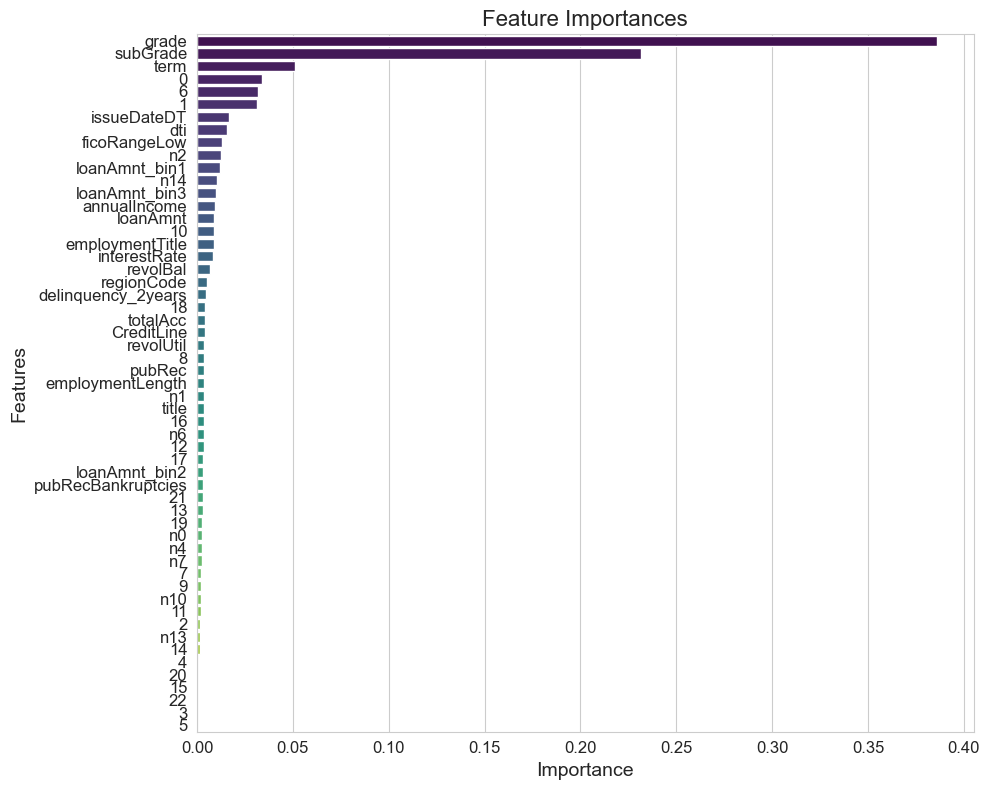

In [99]:
# 特征重要性
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 获取特征重要性
feature_importances = clf.feature_importances_
feature_names = X.columns  # 假设 X 是你的特征数据集

# 创建一个 DataFrame 来存储特征重要性
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# 按重要性排序
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 绘制特征重要性
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [100]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# 划分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.1, random_state=53)

# 初始化基分类器
gra = GradientBoostingClassifier()
xgb = XGBClassifier()
lgb = LGBMClassifier()

# 初始化目标分类器
lr = LogisticRegression()

# 初始化 StackingClassifier
sclf = StackingClassifier(classifiers=[gra, xgb, lgb], 
                          use_probas=True,
                          meta_classifier=lr)

# 训练 StackingClassifier
sclf.fit(Xtrain, Ytrain)

# 预测测试集的概率
pre = sclf.predict_proba(Xtest)[:, 1]

# 计算 ROC 曲线
fpr, tpr, thresholds = roc_curve(Ytest, pre)

# 计算 AUC 分数
score = auc(fpr, tpr)
print(f'AUC Score: {score:.4f}')

[LightGBM] [Info] Number of positive: 143764, number of negative: 576236
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.089851 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3005
[LightGBM] [Info] Number of data points in the train set: 720000, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.199672 -> initscore=-1.388344
[LightGBM] [Info] Start training from score -1.388344
AUC Score: 0.7256
